## Text-to-Image Generation using Stable Diffusion and Diffusers



In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/4.6 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.6 MB ? eta -:--:--
   ------------- -------------------------- 1.6/4.6 MB 4.7 MB/s eta 0:00:01
   ------------------------- -------------- 2.9/4.6 MB 5.2 MB/s eta 0:00:01
   ------------------------------------ --- 4.2/4.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 4.6/4.6 MB 5.4 MB/s  0:00:00
   ---------------------------------------- 0.0/113.7 MB ? eta -:--:--
   ---------------------------------------- 1.3/113.7 MB 6.1 MB/s eta 0:00:19
    --------------------------------------- 2.4/113.7 MB 6.1 MB/s eta 0:00:19
   - -------------------------------------- 3.7/113.7 MB 6.1 MB/s eta 0:00:19
   - -------------------------------------- 5.0/113.7 MB 6.2 MB/s eta 0:00:18
   -- ------------------------------------- 6.3/113

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

c:\Users\M.Safnas\Miniconda3\envs\imdb\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\M.Safnas\Miniconda3\envs\imdb\Lib\site-packages\diffusers\models\transformers\transformer_kandinsky.py:168: UserWarning: CUDA is not available or torch_xla is imported. Disabling autocast.
  @torch.autocast(device_type="cuda", dtype=torch.float32)
c:\Users\M.Safnas\Miniconda3\envs\imdb\Lib\site-packages\diffusers\models\transformers\transformer_kandinsky.py:272: UserWarning: CUDA is not available or torch_xla is imported. Disabling autocast.
  @torch.autocast(device_type="cuda", dtype=torch.float32)


In [3]:
!pip show torch

Name: torch
Version: 2.10.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org
Author: 
Author-email: PyTorch Team <packages@pytorch.org>
License: BSD-3-Clause
Location: C:\Users\M.Safnas\Miniconda3\envs\imdb\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate


In [6]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

# Select device and dtype based on CUDA availability
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32
print(f"Using device: {device}, dtype: {dtype}")
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=dtype, use_safetensors=True)
pipe = pipe.to(device)

Using device: cpu, dtype: torch.float32


Loading weights: 100%|██████████| 196/196 [00:00<00:00, 403.44it/s, Materializing param=text_model.final_layer_norm.weight]
CLIPTextModel LOAD REPORT from: C:\Users\M.Safnas\.cache\huggingface\hub\models--dreamlike-art--dreamlike-diffusion-1.0\snapshots\9fb5a6463bf79d81152e715e8d2a8b988f96c790\text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]


In [7]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [8]:
image = pipe(prompt).images[0]

100%|██████████| 50/50 [03:49<00:00,  4.58s/it]


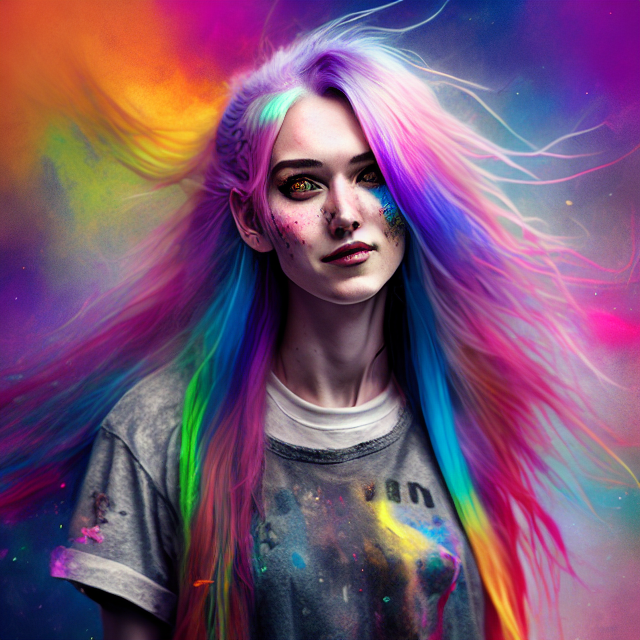

In [11]:
image

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



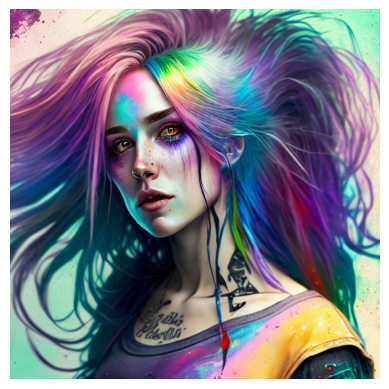

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt2 = """A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



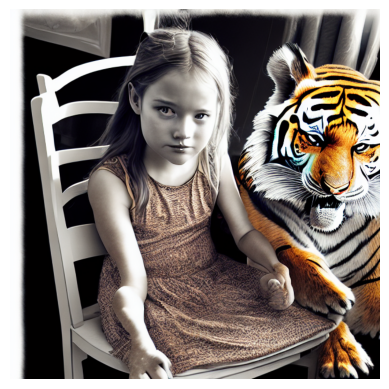

In [ ]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [ ]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [ ]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

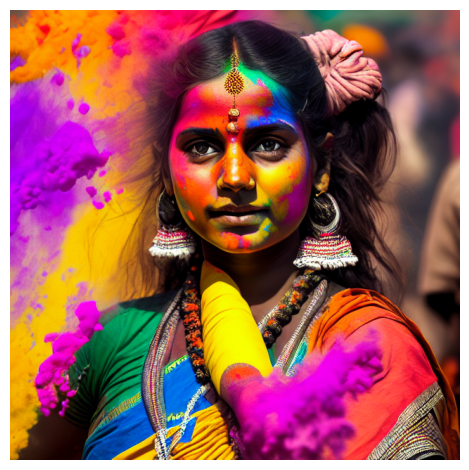

In [ ]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

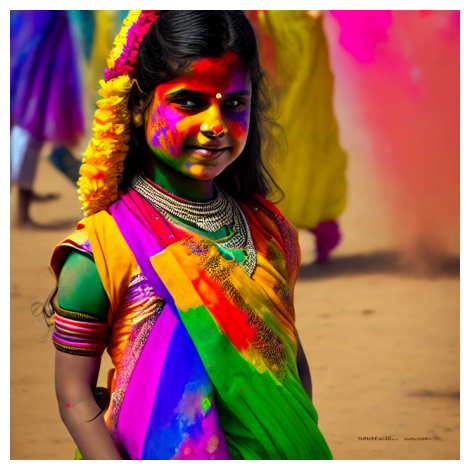

In [ ]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

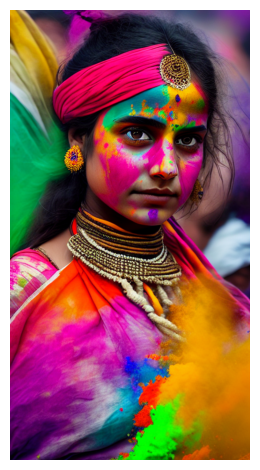

In [ ]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

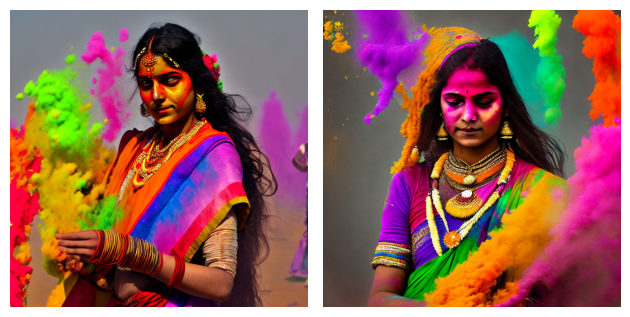

In [ ]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

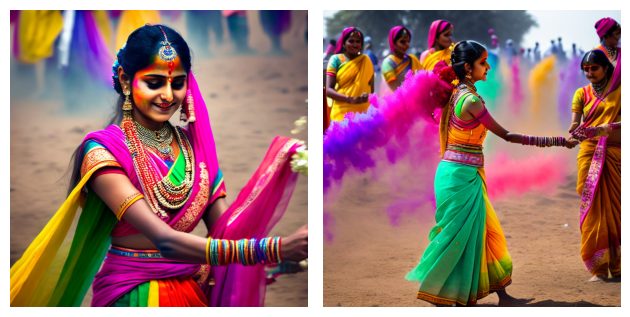

In [ ]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)